<br>
<br>

# SECOND PART OF THE PROJECT

<br>

# Before modelling - analyze missing values in *test* dataset

We have to analyze the test dataset separately since we didn't do that in exploratory analysis. We will follow the same logic.

In [1]:
# Import all needed packages
import numpy as np
import pandas as pd
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
count_of_null_values = df_test.isna().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
percentage = percent * 100
percentage = percentage.apply(lambda x: "{:0.2f}{}".format(x,'%'))

missing_data2 = pd.concat([count_of_null_values, percentage], axis=1, keys=['Count of null-values occurrences', 'Percentage of null-values occurrences'])
missing_data2.head(34)

,Count of null-values occurrences,Percentage of null-values occurrences
PoolQC,1456,99.79%
MiscFeature,1408,96.50%
Alley,1352,92.67%
Fence,1169,80.12%
FireplaceQu,730,50.03%
LotFrontage,227,15.56%
GarageCond,78,5.35%
GarageQual,78,5.35%
GarageYrBlt,78,5.35%
GarageFinish,78,5.35%


In [4]:
df_test_x = df_test.copy()

##### <font color='blue'> PoolQC </font> <a id="poolqc">

In [5]:
# Number of rows which have null(NA) values in column 'PoolQC'
number_of_nulls = df_test[df_test['PoolQC'].isna()].shape[0]

# Number of rows which have zeros in column 'PoolArea'
number_of_zeros = df_test[df_test['PoolArea'] == 0].shape[0]

# Number of rows which have both 'NA' in 'PoolQC' and 0 in 'PoolArea'
zeros_and_nulls = df_test[(df_test['PoolQC'].isna()) & (df_test['PoolArea'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'PoolQC': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'PoolArea': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'PoolQC': 1456
Number of rows containing 0 in column 'PoolArea': 1453

Number of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': 1453


For those 1453 rows that contain both 0 for PoolArea and NaN for PoolQC, we will fill their null values with "NoPool".
There are other 3 rows with null values that have PoolArea > 0. Since we have only 3 rows with non-null PoolQC, we can't decide anything about relationship between PoolArea and PoolQC. But we notice that PoolArea for our 3 rows are big in comparison to those 3 existing pools, and other features don't stand out, so we will fill PoolQC with "Ex".

In [6]:
df_test_x.loc[(df_test_x['Id'] == 2421) | (df_test_x['Id'] == 2504) | (df_test_x['Id'] == 2600), 'PoolQC'] = 'Ex'
df_test_x['PoolQC'].fillna('NoPool', inplace=True)

##### <font color='blue'> MiscFeature </font> <a id="miscfeature">

In [7]:
# Number of rows which have null(NA) values in column 'MiscFeature'
number_of_nulls = df_test_x[df_test_x['MiscFeature'].isna()].shape[0]

# Number of rows which have zeros in column 'MiscVal'
number_of_zeros = df_test_x[df_test_x['MiscVal'] == 0].shape[0]

# Number of rows which have both 'NA' in 'MiscFeature' and 0 in 'MiscVal'
zeros_and_nulls = df_test_x[(df_test_x['MiscFeature'].isna()) & (df_test_x['MiscVal'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'MiscFeatures': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'MiscVal': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'MiscFeatures': 1408
Number of rows containing 0 in column 'MiscVal': 1408

Number of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': 1407


Those 1407 null values will be filled with "NoMiscFeature". For one row with MiscVal = 0 and MiscFeature = Shed, we will fill MiscFeature with average value of MiscFeature = "Shed". For one row with MiscFeature = NaN and MiscVal > 0, we can't conclude anything. It has very high value for MiscVal compared to others. We will drop this row. 

In [8]:
# Drop one row
df_test_x.drop(df_test_x[df_test_x['Id'] == 2550].index, inplace=True)

# Fill in average value of MiscVal where MiscFeature = Shed
means = df_test_x.groupby('MiscFeature')['MiscVal'].mean()
df_test_x.loc[(df_test_x['Id'] == 2432), 'MiscVal'] = means['Shed']

# Fill NaNs with "NoMiscFeature"
df_test_x['MiscFeature'].fillna('NoMiscFeature', inplace=True)

#####  <font color='blue'> Alley </font> <a id="alley">

Explanation as for train dataset. 

In [9]:
df_test_x['Alley'].fillna('NoAlley', inplace=True)

##### <font color='blue'> Fence </font> <a id="fence">

Explanation as for train dataset.

In [10]:
df_test_x['Fence'].fillna('NoFence', inplace=True)

##### <font color='blue'> FireplaceQu </font> <a id="fireplacequ">

In [11]:
# Number of rows which have null(NA) values in column 'FireplaceQu'
number_of_nulls = df_test_x[df_test_x['FireplaceQu'].isna()].shape[0]

# Number of rows which have zeros in column 'Fireplaces'
number_of_zeros = df_test_x[df_test_x['Fireplaces'] == 0].shape[0]

# Number of rows which have both 'NA' in 'FireplaceQu' and 0 in 'Fireplaces'
zeros_and_nulls = df_test_x[(df_test_x['FireplaceQu'].isna()) & (df_test_x['Fireplaces'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'FireplaceQu': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'Fireplaces': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'FireplaceQu': 730
Number of rows containing 0 in column 'Fireplaces': 730

Number of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': 730


Explanation as for train dataset.

In [12]:
df_test_x['FireplaceQu'].fillna('NoFireplace', inplace=True)

##### <font color='blue'> LotFrontage </font> <a id="lotfrontage">

In [13]:
# Number of rows with 0 in column 'LotFrontage'
zeros = df_test_x[df_test_x['LotFrontage'] == 0].shape[0]
print("Number of rows that contain 0 in column 'LotFrontage': {}" .format(zeros))

Number of rows that contain 0 in column 'LotFrontage': 0


Explanation as for train dataset.

In [14]:
# Group by neighborhood and fill in missing value by the median of all LotFrontages in the neighborhood it belongs to   
df_test_x['LotFrontage'] = df_test_x.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

##### <font color='blue'> GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt, GarageArea, GarageCars </font> <a id="garagex">

In [15]:
# Just a condition that we will use in the next line, it checks the null values of those 5 specific columns
all_nulls_condition = (df_test_x['GarageCond'].isna()) & (df_test_x['GarageType'].isna()) & (df_test_x['GarageFinish'].isna()) & (df_test_x['GarageQual'].isna()) & (df_test_x['GarageYrBlt'].isna())

# Just a condition that we will use in the next line, it checks the zeros in those 2 specific columns
all_zeros_condition = (df_test_x['GarageCars'] == 0) & (df_test_x['GarageArea'] == 0)

# Number of rows which have both 'NA' in 5 variables and 0 in 2 variables
zeros_and_nulls = df_test_x[all_nulls_condition & all_zeros_condition].shape[0]

print("\nNumber of rows which have all zeros and nulls in all 7 variables: {}" .format(zeros_and_nulls))


Number of rows which have all zeros and nulls in all 7 variables: 76


Those 76 rows will be filled with "NoGarage". Other two rows where some features have null values, and some don't, will be treated as "NoGarage" rows.

In [16]:
df_test_x['GarageCond'].fillna('NoGarage', inplace=True)
df_test_x['GarageType'].fillna('NoGarage', inplace=True)
df_test_x['GarageQual'].fillna('NoGarage', inplace=True)
df_test_x['GarageFinish'].fillna('NoGarage', inplace=True)
df_test_x['GarageYrBlt'].fillna(0, inplace=True)

# Two specific rows
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageType'] = 'NoGarage'
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageCars'] = 0
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageArea'] = 0

##### <font color='blue'> BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, <br> BsmtHalfBath, BsmtFullBath, BsmtFinSF2, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF </font> <a id="bsmtx">

In [17]:
# Number of rows which have null(NA) values in those 5 specific columns (separately)
number_of_nulls1 = df_test_x[df_test_x['BsmtExposure'].isna()].shape[0]
number_of_nulls2 = df_test_x[df_test_x['BsmtFinType2'].isna()].shape[0]
number_of_nulls3 = df_test_x[df_test_x['BsmtFinType1'].isna()].shape[0]
number_of_nulls4 = df_test_x[df_test_x['BsmtCond'].isna()].shape[0]
number_of_nulls5 = df_test_x[df_test_x['BsmtQual'].isna()].shape[0]

print("Number of rows containing 'NA' in column 'BsmtExposure': {}" .format(number_of_nulls1))
print("Number of rows containing 'NA' in column 'BsmtFinType2': {}" .format(number_of_nulls2))
print("Number of rows containing 'NA' in column 'BsmtFinType1': {}" .format(number_of_nulls3))
print("Number of rows containing 'NA' in column 'BsmtCond': {}" .format(number_of_nulls4))
print("Number of rows containing 'NA' in column 'BsmtQual': {}" .format(number_of_nulls5))


# Number of zeros in TotalBsmtSF
number_of_zeros4 = df_test_x[df_test_x['TotalBsmtSF'] == 0].shape[0]
zero_condition = (df_test_x['TotalBsmtSF'] == 0)

print("\nNumber of rows containing 0 in column 'TotalBsmtSF': {}" .format(number_of_zeros4))


# Number of rows which have both 'NA' in 5 variables and 0 in 6 variables
zeros_and_nulls = df_test_x[all_nulls_condition & zero_condition].shape[0]

print("\nNumber of rows which have zeros for TotalBsmtSF and nulls in those 5 variables: {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'BsmtExposure': 44
Number of rows containing 'NA' in column 'BsmtFinType2': 42
Number of rows containing 'NA' in column 'BsmtFinType1': 42
Number of rows containing 'NA' in column 'BsmtCond': 45
Number of rows containing 'NA' in column 'BsmtQual': 44

Number of rows containing 0 in column 'TotalBsmtSF': 41

Number of rows which have zeros for TotalBsmtSF and nulls in those 5 variables: 7


Those 41 row from above will be treated as "NoBsmt". Let's see what to do with those few remaining null values.

In [18]:
df_test_x[['Id', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']][((df_test_x['BsmtExposure'].isna()) | (df_test_x['BsmtFinType2'].isna()) | (df_test_x['BsmtFinType1'].isna()) | (df_test_x['BsmtCond'].isna()) | (df_test_x['BsmtQual'].isna())) & (df_test_x['TotalBsmtSF'] > 0)]

,Id,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
27,1488,NaN,Unf,Unf,TA,Gd,0.0,0.0,0.0,0.0,1595.0,1595.0
580,2041,Mn,Rec,GLQ,NaN,Gd,0.0,1.0,382.0,1044.0,0.0,1426.0
725,2186,No,Unf,BLQ,NaN,TA,1.0,0.0,0.0,1033.0,94.0,1127.0
757,2218,No,Unf,Unf,Fa,NaN,0.0,0.0,0.0,0.0,173.0,173.0
758,2219,No,Unf,Unf,TA,NaN,0.0,0.0,0.0,0.0,356.0,356.0
888,2349,NaN,Unf,Unf,TA,Gd,0.0,0.0,0.0,0.0,725.0,725.0
1064,2525,Av,Unf,ALQ,NaN,TA,0.0,0.0,0.0,755.0,240.0,995.0


Id = 1488: Since basement is unfinished, probably BsmtExposure is not built (yet or ever will be). So we will fil "No". <br>
Id = 2041: Based on other Bsmt values, we expect basement is in good overall condition. <br>
Id = 2186: Based on other Bsmt values, we expect basement is in typical overall condition. <br>
Id = 2218: Based on other Bsmt values, we expect basement has fair BsmtQual. Features say it is a small place with fair condition, so probably cramped. <br>
Id = 2219: Based on other Bsmt values, we expect basement has typical BsmtQual. <br>
Id = 2349: Since basement is unfinished, probably BsmtExposure is not built (yet or ever will be). So we will fil "No". <br>
Id = 2525: Based on other Bsmt values, we expect basement is in good overall condition.

In [19]:
# Fix these few specific rows
df_test_x.loc[(df_test_x['Id'] == 1488) | (df_test_x['Id'] == 2349), 'BsmtExposure'] = 'No'
df_test_x.loc[(df_test_x['Id'] == 2041) | (df_test_x['Id'] == 2525), 'BsmtCond'] = 'Gd'
df_test_x.loc[(df_test_x['Id'] == 2186), 'BsmtCond'] = 'TA'
df_test_x.loc[(df_test_x['Id'] == 2218), 'BsmtQual'] = 'Fa'
df_test_x.loc[(df_test_x['Id'] == 2219), 'BsmtQual'] = 'TA'

# Fill new values for the rest of the *NA* values
df_test_x['BsmtExposure'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtFinType2'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtFinType1'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtCond'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtQual'].fillna('NoBsmt', inplace=True)

In [20]:
df_test_x[['Id', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']][((df_test_x['BsmtHalfBath'].isna()) | (df_test_x['BsmtFullBath'].isna()) | (df_test_x['BsmtFinSF2'].isna()) | (df_test_x['BsmtFinSF1'].isna()) | (df_test_x['TotalBsmtSF'].isna()) | (df_test_x['BsmtUnfSF'].isna()))]

,Id,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
660,2121,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NaN,NaN,NaN,NaN,NaN
728,2189,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NaN,0.0,0.0,0.0,0.0


We will fill missing values with zeros.

In [21]:
df_test_x['BsmtHalfBath'].fillna(0, inplace=True)
df_test_x['BsmtFullBath'].fillna(0, inplace=True)
df_test_x['BsmtFinSF2'].fillna(0, inplace=True)
df_test_x['BsmtFinSF1'].fillna(0, inplace=True)
df_test_x['BsmtUnfSF'].fillna(0, inplace=True)
df_test_x['TotalBsmtSF'].fillna(0, inplace=True)

##### <font color='blue'> MasVnrArea, MasVnrType </font> <a id="masvnrx">

In [22]:
# Number of rows that contain 'NA' for both columns 'MasVnrArea' and 'MasVnrType'
nulls = df_test_x[(df_test_x['MasVnrArea'].isna()) & (df_test_x['MasVnrType'].isna())].shape[0]

print("Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': {}" .format(nulls))

Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': 15


In [23]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['MasVnrArea'].notnull()) & (df_test_x['MasVnrType'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1150,2611,20,RL,124.0,27697,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NoFireplace,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,11,2007,COD,Abnorml


Since everything is typical about this house, we will fill missing MasVnrType with most often MasVnrType.

In [24]:
df_test_x['MasVnrType'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MasVnrType
0,None,878
1,BrkFace,434
2,Stone,120
3,BrkCmn,10


In [25]:
df_test_x.loc[(df_test_x['Id'] == 2611), 'MasVnrType'] = 'BrkFace'

# Filling with zeros and 'None'
df_test_x['MasVnrArea'].fillna(0, inplace=True)
df_test_x['MasVnrType'].fillna('None', inplace=True)

##### <font color='blue'> MSZoning </font> <a id="electrical">

Since MSZoning is location based feature, we will find most often values for MSZoning in belonging neighborhood.

In [26]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['MSZoning'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Abnorml
790,2251,70,NaN,60.0,56600,Pave,NoAlley,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NoFireplace,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NoFireplace,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,5,2006,WD,Normal


In [27]:
df_test_x['MSZoning'][df_test_x['Neighborhood'] == 'IDOTRR'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MSZoning
0,RM,40
1,C (all),13


In [28]:
df_test_x['MSZoning'][df_test_x['Neighborhood'] == 'Mitchel'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MSZoning
0,RL,60
1,RM,4


In [29]:
df_test_x.loc[(df_test_x['Id'] == 2905), 'MSZoning'] = 'RL'

# Filling all the other missing values with 'RM'
df_test_x['MSZoning'].fillna('RM', inplace=True)

##### <font color='blue'> Utilities </font> <a id="electrical">

In [30]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Utilities'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,RM,109.0,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,3,2009,ConLD,Normal
485,1946,20,RL,63.0,31220,Pave,NoAlley,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NoPool,NoFence,Shed,750.0,5,2008,WD,Normal


In [31]:
df_test_x['Utilities'][(df_test_x['Neighborhood'] == 'Gilbert') | (df_test_x['Neighborhood'] == 'IDOTRR')].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Utilities
0,AllPub,140


In [32]:
df_test_x['Utilities'].fillna('AllPub', inplace=True)

##### <font color='blue'> Functional </font> <a id="electrical">

In [33]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Functional'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,RM,80.0,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NoFireplace,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NoPool,NoFence,NoMiscFeature,0.0,9,2007,COD,Abnorml


In [34]:
df_test_x['Functional'][(df_test_x['Neighborhood'] == 'IDOTRR') & (df_test_x['OverallQual'] < 5) & (df_test_x['OverallCond'] < 6)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Functional
0,Typ,6
1,Min1,2
2,Maj2,1
3,Mod,1


In [35]:
df_test_x['Functional'].fillna('Typ', inplace=True)

##### <font color='blue'> SaleType </font> <a id="electrical">

In [36]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['SaleType'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,10,2007,NaN,Normal


In [37]:
df_test_x['SaleType'][(df_test_x['SaleCondition'] == 'Normal') & (df_test_x['Neighborhood'] == 'Sawyer') & (df_test_x['OverallQual'] >= 5) & (df_test_x['OverallCond'] >= 6)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,SaleType
0,WD,27
1,COD,1


In [38]:
df_test_x['SaleType'].fillna('WD', inplace=True)

##### <font color='blue'> Exterior1st, Exterior2nd </font> <a id="electrical">

In [39]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Exterior1st'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NoGarage,0.0,NoGarage,0.0,0.0,NoGarage,NoGarage,Y,0,39,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2008,WD,Normal


In [40]:
df_test_x['Exterior1st'][(df_test_x['YearBuilt'] > 1930) & (df_test_x['YearBuilt'] < 1950) & (df_test_x['YearRemodAdd'] > 2000) & (df_test_x['MasVnrType'] == 'None') & (df_test_x['Neighborhood'] == 'Edwards') & (df_test_x['OverallQual'] > 2) & (df_test_x['OverallCond'] > 4)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Exterior1st
0,Wd Sdng,2
1,VinylSd,1


In [41]:
df_test_x['Exterior2nd'][(df_test_x['YearBuilt'] > 1930) & (df_test_x['YearBuilt'] < 1950) & (df_test_x['YearRemodAdd'] > 2000) & (df_test_x['MasVnrType'] == 'None') & (df_test_x['Neighborhood'] == 'Edwards') & (df_test_x['OverallQual'] > 2) & (df_test_x['OverallCond'] > 4)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Exterior2nd
0,Wd Sdng,2
1,VinylSd,1


In [42]:
df_test_x['Exterior1st'].fillna('Wd Sdng', inplace=True)
df_test_x['Exterior2nd'].fillna('Wd Sdng', inplace=True)

##### <font color='blue'> KitchenQual </font> <a id="electrical">

In [43]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['KitchenQual'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NoFireplace,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2010,COD,Normal


In [44]:
df_test_x['KitchenQual'][(df_test_x['Neighborhood'] == 'ClearCr') & (df_test_x['OverallQual'] > 4) & (df_test_x['OverallCond'] > 2)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,KitchenQual
0,TA,10
1,Gd,5


In [45]:
df_test_x['KitchenQual'].fillna('TA', inplace=True)

In [46]:
count_of_null_values = df_test_x.isna().sum().sort_values(ascending=False)
percent = (df_test_x.isnull().sum()/df_test_x.isnull().count()).sort_values(ascending=False)
percentage = percent * 100
percentage = percentage.apply(lambda x: "{:0.2f}{}".format(x,'%'))

missing_data2 = pd.concat([count_of_null_values, percentage], axis=1, keys=['Count of null-values occurrences', 'Percentage of null-values occurrences'])
missing_data2.head(1)

,Count of null-values occurrences,Percentage of null-values occurrences
SaleCondition,0,0.00%


<br>

# Modelling neural network

In this notebook we are modelling the **feed forward neural network** using PyTorch. A feedforward neural network is an artificial neural network wherein connections between the nodes do not form a cycle. <br>
<br>
Firstly we will implement and apply data transformations that we observed in exploratory analysis and that could help training our model. Those tranformations are: 
- fixing missing values, wrong types of features and removing outliers if any
- grouping connected features, creating new features that seem important
- transforming categorical features into numerical, some numerical (that act like categorical) into categorical features
- feature engineering
- fixing skewness in right skewed data, normalizing data 

Then we will build the neural network with PyTorch. We will apply several techniques that could help, like:
- <u>batch normalization</u>: Batch normalization is a technique that can improve the learning rate of a neural network. It does so by minimizing internal covariate shift which is essentially the phenomenon of each layer’s input distribution changing as the parameters of the layer above it change during training. You dynamically normalize the inputs on a per mini-batch basis. <br>
<br>
- <u>dropout</u>: During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. Each channel will be zeroed out independently on every forward call. Dropout deactivates the neurons randomly at each training step instead of training the data on the original network, we train the data on the network with dropped out nodes. <br>
<br>
- <u>weights initialization</u>: The aim of weight initialization is to prevent layer activation outputs from exploding or vanishing during the course of a forward pass through a deep neural network. If either occurs, loss gradients will either be too large or too small to flow backwards beneficially, and the network will take longer to converge, if it is even able to do so at all. This has proven to be an effective technique for regularization and preventing the co-adaptatifon of neurons.

We will divide our training dataset into *training* and *validation* datasets. Training dataset will be used as a dataset for training the model, and validation dataset will be used to evaluate and choose which hyperparameters suit trained model the best. Then we will run the model on test dataset to get predicted *SalePrice*s.

Packages that need to be installed in the beginning are *matplotlib, numpy, pandas, scipy*. Later will be needed *PyTorch* which we will describe then.

In [47]:
# Import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import warnings
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

<HR>
    
## Fixing missing values, fixing wrong types, removing outliers
    
We already discussed these problems in exploratory analysis, you can see detailed explanations there. Now we will just implement them.

In [49]:
# Only for train dataset!
def fixMissingValuesTrain(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    dataset['PoolQC'].fillna('NoPool', inplace=True)
    dataset['MiscFeature'].fillna('NoMiscFeature', inplace=True)
    dataset['Alley'].fillna('NoAlley', inplace=True)
    dataset['Fence'].fillna('NoFence', inplace=True)
    dataset['FireplaceQu'].fillna('NoFireplace', inplace=True)

    # Group by neighborhood and fill in missing value by the median of all LotFrontages in the neighborhood it belongs to   
    dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # GarageX features
    dataset['GarageCond'].fillna('NoGarage', inplace=True)
    dataset['GarageType'].fillna('NoGarage', inplace=True)
    dataset['GarageQual'].fillna('NoGarage', inplace=True)
    dataset['GarageFinish'].fillna('NoGarage', inplace=True)
    dataset['GarageYrBlt'].fillna(0, inplace=True)

    # BasementX features: Delete two rows from dataFrame
    dataset.drop(dataset[dataset['Id'] == 333].index, inplace=True)
    dataset.drop(dataset[dataset['Id'] == 949].index, inplace=True)

    # BasementX features: Fill new values for the rest of the *NA* values
    dataset['BsmtExposure'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType2'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType1'].fillna('NoBsmt', inplace=True)
    dataset['BsmtCond'].fillna('NoBsmt', inplace=True)
    dataset['BsmtQual'].fillna('NoBsmt', inplace=True)

    # MasVnrX features: Filling with zeros and 'None'
    dataset['MasVnrArea'].fillna(0, inplace=True)
    dataset['MasVnrType'].fillna('None', inplace=True)

    # Electrical feature: Fill the 'NA' value with 'SBrkr'
    dataset['Electrical'].fillna('SBrkr', inplace=True)

    return dataset

In [50]:
# Only for test dataset!
def fixMissingValuesTest(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # PoolQC
    dataset.loc[(dataset['Id'] == 2421) | (dataset['Id'] == 2504) | (dataset['Id'] == 2600), 'PoolQC'] = 'Ex'
    dataset['PoolQC'].fillna('NoPool', inplace=True)

    # MiscVal, MiscFeature
    means = dataset.groupby('MiscFeature')['MiscVal'].mean()
    dataset.loc[(dataset['Id'] == 2432), 'MiscVal'] = means['Shed']
    dataset.loc[(dataset['Id'] == 2550), 'MiscFeature'] = 'Gar2'
    dataset['MiscFeature'].fillna('NoMiscFeature', inplace=True)
    
    # Alley
    dataset['Alley'].fillna('NoAlley', inplace=True)

    # Fence
    dataset['Fence'].fillna('NoFence', inplace=True)
    
    # FireplaceQu
    dataset['FireplaceQu'].fillna('NoFireplace', inplace=True)
    
    # LotFrontage  
    dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt, GarageArea, GarageCars
    dataset['GarageCond'].fillna('NoGarage', inplace=True)
    dataset['GarageType'].fillna('NoGarage', inplace=True)
    dataset['GarageQual'].fillna('NoGarage', inplace=True)
    dataset['GarageFinish'].fillna('NoGarage', inplace=True)
    dataset['GarageYrBlt'].fillna(0, inplace=True)
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageType'] = 'NoGarage'
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageCars'] = 0
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageArea'] = 0
    
    # BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, BsmtHalfBath, BsmtFullBath, BsmtFinSF2, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF 
    dataset.loc[(dataset['Id'] == 1488) | (dataset['Id'] == 2349), 'BsmtExposure'] = 'No'
    dataset.loc[(dataset['Id'] == 2041) | (dataset['Id'] == 2525), 'BsmtCond'] = 'Gd'
    dataset.loc[(dataset['Id'] == 2186), 'BsmtCond'] = 'TA'
    dataset.loc[(dataset['Id'] == 2218), 'BsmtQual'] = 'Fa'
    dataset.loc[(dataset['Id'] == 2219), 'BsmtQual'] = 'TA'
    dataset['BsmtExposure'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType2'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType1'].fillna('NoBsmt', inplace=True)
    dataset['BsmtCond'].fillna('NoBsmt', inplace=True)
    dataset['BsmtQual'].fillna('NoBsmt', inplace=True)
    dataset['BsmtHalfBath'].fillna(0, inplace=True)
    dataset['BsmtFullBath'].fillna(0, inplace=True)
    dataset['BsmtFinSF2'].fillna(0, inplace=True)
    dataset['BsmtFinSF1'].fillna(0, inplace=True)
    dataset['BsmtUnfSF'].fillna(0, inplace=True)
    dataset['TotalBsmtSF'].fillna(0, inplace=True)
    
    # MasVnrArea, MasVnrType
    dataset.loc[(dataset['Id'] == 2611), 'MasVnrType'] = 'BrkFace'
    dataset['MasVnrArea'].fillna(0, inplace=True)
    dataset['MasVnrType'].fillna('None', inplace=True)
    
    # MSZoning
    dataset.loc[(dataset['Id'] == 2905), 'MSZoning'] = 'RL'
    dataset['MSZoning'].fillna('RM', inplace=True)

    # Utilities
    dataset['Utilities'].fillna('AllPub', inplace=True)
    
    # Functional
    dataset['Functional'].fillna('Typ', inplace=True)
    
    # SaleType
    dataset['SaleType'].fillna('WD', inplace=True)
    
    # Exterior1st, Exterior2nd
    dataset['Exterior1st'].fillna('Wd Sdng', inplace=True)
    dataset['Exterior2nd'].fillna('Wd Sdng', inplace=True)

    # KitchenQual
    dataset['KitchenQual'].fillna('TA', inplace=True)
    
    return dataset

In [51]:
# For both train and test dataset
def fixWrongTypes(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # (1) Square feet: int -> float
    columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
    for col in columns:
        dataset[col] = dataset[col].astype(float)
    
    # (2) Years: float -> int
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)
    
    # (3) Values: int -> float
    dataset['MiscVal'] = dataset['MiscVal'].astype(float)
    # If it is test dataset, there will be no 'SalePrice' column
    if 'SalePrice' in dataset.columns:
        dataset['SalePrice'] = dataset['SalePrice'].astype(float)
    
    return dataset

In [52]:
# Only for train dataset!

# Removing two outliers with Ids 524 and 1299 that were found in exploratory analysis in section 4.2 Bivariate analysis
def removeOutliers(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # Delete two rows from dataFrame
    dataset.drop(dataset[dataset['Id'] == 524].index, inplace=True)
    dataset.drop(dataset[dataset['Id'] == 1299].index, inplace=True)
    
    return dataset

<HR>
    
## Fixing categorical features

Now, let's transform numerical variables that we think are actually categorical. Those are MSSubClass, which identifies the type of dwelling involved in the sale and doesn't necessarily have ordinal relationship which is implied by giving it numerical values, YrSold, because those are in a span from 2006 to 2010 and since 2007 the prices of houses were dropping due to economical crisis, and MoSold. 

In [53]:
def numToCat(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    #MSSubClass
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)

    #Year and month sold
    dataset['YrSold'] = dataset['YrSold'].astype(str)
    dataset['MoSold'] = dataset['MoSold'].astype(str)
    
    return dataset

<br>
Next, let's change all categorical features into numerical because machine learning algorithms usually work only with numerical values. First, with Label Encoder we transform variables whose values have ordinal realtionship, for example ExterQual which has values Ex = Excellent, Gd = Good, TA = Average/Typical, Fa = Fair, Po = Poor. After that, we transform the rest of the variables without ordinal implication, like feature Neighborhood, using get_dummies function from pandas.

In [54]:
def catToNum(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # LabelEncoder
    cols = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
        'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Functional', 
        'Fence', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive')

    for c in cols:
        lbl = LabelEncoder() 
        lbl.fit(list(dataset[c].values)) 
        dataset[c] = lbl.transform(list(dataset[c].values))
        
    #convert rest of categorical variables into dummy
    dataset = pd.get_dummies(dataset)
    
    return dataset    

<HR>
    
## Grouping features and creating new ones

Now we are going to create new attributes to add specific information that simplify the model by creating sums, averages, Boolean variables or general state of attribute.

Sum attributes only replace (and eliminate) columns that, being added to each other, carry significant and complete information about some aspect of house price.

In [55]:
def createNewFeatures(df):
    dataset = df.copy()
    dataset['HasPool'] = dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    dataset['HasGarage'] = dataset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    dataset['IsNew'] = dataset['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)
    dataset['YrSinceSold'] = 2020 - dataset['YrSold']
    
    #dataset.drop('YrSold', axis=1, inplace=True)
    return dataset

In [56]:
def groupFeatures(df):
    dataset = df.copy()
    dataset['OverallTotal'] = (dataset['OverallQual'] + dataset['OverallCond']) / 2
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
    dataset['TotalBath'] = dataset['FullBath'] + dataset['BsmtFullBath'] + 0.5 * (dataset['HalfBath'] + dataset['BsmtHalfBath'])
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['GrLivArea']
    
    #drop columns we do not need anymore
    dataset.drop('OverallQual', axis=1, inplace=True)
    dataset.drop('OverallCond', axis=1, inplace=True)
    dataset.drop('1stFlrSF', axis=1, inplace=True)
    dataset.drop('2ndFlrSF', axis=1, inplace=True)
    dataset.drop('FullBath', axis=1, inplace=True)
    dataset.drop('BsmtFullBath', axis=1, inplace=True)
    dataset.drop('HalfBath', axis=1, inplace=True)
    dataset.drop('BsmtHalfBath', axis=1, inplace=True)
    dataset.drop('TotalBsmtSF', axis=1, inplace=True)
    dataset.drop('GrLivArea', axis=1, inplace=True)
    return dataset

<HR>

## Feature engineering

Let's implement methods for feature selection which will be used later.

We will need some simple functions for extracting tagret value and removing features that seem to be unnecessary from dataset.

In [57]:
def extractTargetValue(df):
    dataset = df.copy()
    y_train = dataset.SalePrice.values
    dataset.drop(['SalePrice'], axis=1, inplace=True)
    
    return dataset, y_train

In [58]:
def removeFeaturesbyIndices(X_train, indices):
    d = {}
    for i in range(X_train.shape[1]):
        if i in indices:
            d[X_train.columns[i]] = X_train[X_train.columns[i]].copy()
    dataset = pd.DataFrame(data = d)
        
    return dataset

In [59]:
def dropFeaturesbyNames(df, features):
    indices = []
    dataset = df.copy()
    for i in range(df.shape[1]):
        test = 0
        for feature in features:
            #Need this step because of hot encoding. We get more attributes
            #for some categorical and names are: attribute_value1, attribute_value2
            if feature in df.columns[i]:
                test = 1
                break
        if(test == 0):
            indices.append(i)
    
    dataset = removeFeaturesbyIndices(dataset, indices)         
            
    return dataset 

Method implemented below is example of supervised, univariate feature selection. It is also example of filter methods for feature selection. It uses scoring function mutual_info_regression and selects k best features due to k best scores.

Function also provides interesting plot which ilustrates scores of features and treshold between selected and unselected features.

In [60]:
def KBest_fs(X_train, y_train, k):
    
    from sklearn.feature_selection import SelectKBest, mutual_info_regression
    dataset = X_train.copy()
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(dataset, y_train)
    scores = selector.scores_
    indices = np.argsort(scores)[::-1]
    
    plt.figure(figsize=(14,10))

    plt.plot(range(dataset.shape[1]), scores[indices], 'o', color='gray')
    
    plt.title('Feature selection')
    plt.ylabel('mututal info regression score')
    plt.xlim([-1, dataset.shape[1]])
    plt.vlines(k-0.5, 0, np.max(scores), color='red', linestyle='--')
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    
    plt.show()
    
    indices = indices[:k]
    
    return indices

### Univariate feature selection 

First, let's extract target variable 'SalePrice' to y_train, and the rest of the dataset to X_train.

In [61]:
df_train_ea = fixMissingValuesTrain(df_train)
df_train_ea = fixWrongTypes(df_train_ea)
df_train_ea = removeOutliers(df_train_ea)
df_train_ea = createNewFeatures(df_train_ea)
df_train_ea = groupFeatures(df_train_ea)
df_train_ea = numToCat(df_train_ea)
df_train_ea = catToNum(df_train_ea)

X_train, y_train = extractTargetValue(df_train_ea)

In [62]:
X_train.shape[1]

252

We can see that after encoding categorical variables, we have a big number of features. So, before applying models, univariate features selection will be applied. Later, we will also use wraper-based and embedded methods.

In analysis of correlation and association between features, we saw that there are some pairs of features which are highly correlated/associated. Let's remove them, they provide almost the same information about 'SalePrice'.

In [63]:
features_from_correlated_pairs = ['TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageType', 'BsmtFinType1',
                                 'KitchenQual', 'Foundation']

In [64]:
X_train = dropFeaturesbyNames(X_train, features_from_correlated_pairs)

Now, method which uses mutual information regression and k best selector is applied. As number of best features to select we choose half the current number of features.

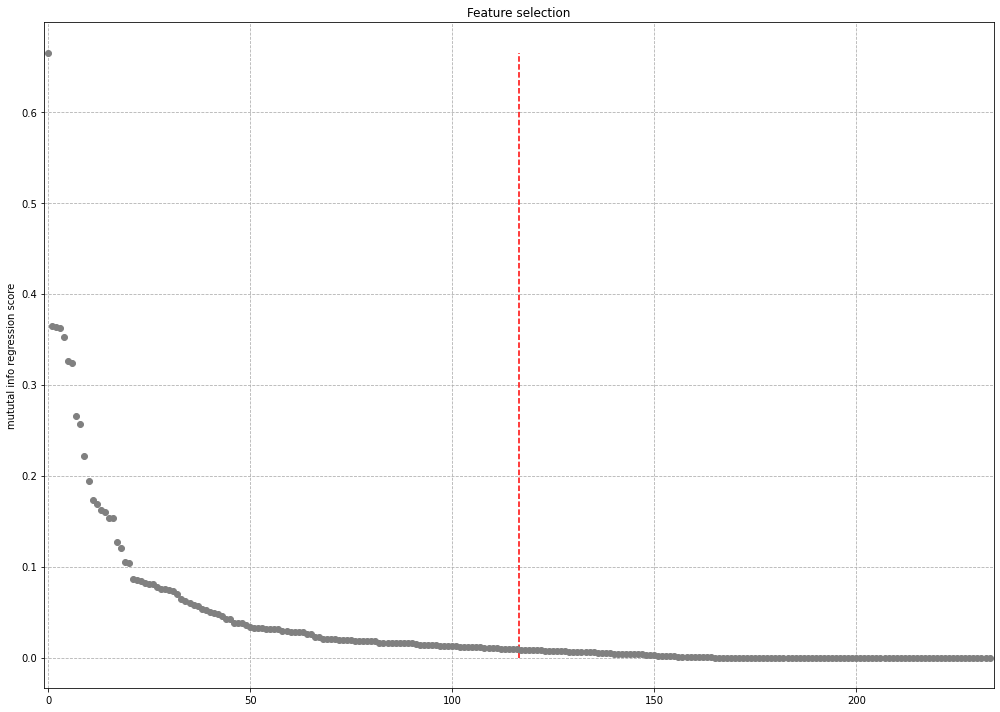

In [65]:
indices_KBest = KBest_fs(X_train, y_train, (int)(X_train.shape[1]/2))

In [66]:
X_train.columns[indices_KBest][:30]

Index(['TotalSF', 'GarageCars', 'YearBuilt', 'OverallTotal', 'TotalBath',
       'BsmtQual', 'ExterQual', 'GarageFinish', 'GarageYrBlt', 'LotFrontage',
       'FireplaceQu', 'HeatingQC', 'IsNew', 'Fireplaces', 'LotArea',
       'BsmtFinSF1', 'OpenPorchSF', 'MSSubClass_60', 'BsmtUnfSF', 'WoodDeckSF',
       'MasVnrArea', 'LotShape', 'SaleCondition_Partial', 'MSZoning_RM',
       'Exterior2nd_VinylSd', 'SaleType_New', 'MSSubClass_30', 'BsmtExposure',
       'GarageCond', 'CentralAir_N'],
      dtype='object')

<HR>
    
## Fixing skewness and normalizing data (Mia - 10,11)

### Skewness (apply log)

In [67]:
def fixSkewness(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # Take only numeric features, without 'Id', and calculate their skewness
    numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index
    #numeric_feats = numeric_feats.drop('Id')
    skewed_feats = dataset[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

    # Extract features that are skewed (both positive (right) or negative (left))
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness = skewness[abs(skewness) > 0.75]
    print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))

    # Logarithmize skewed features -> calculate the natural logarithm of one plus the input array, element-wise ---> log(1 + x).
    skewed_features = skewness.index
    dataset[skewed_features] = np.log1p(dataset[skewed_features]) 
    
    return dataset, skewed_features

### Normalizing

In [68]:
def normalizeNN(df_train, df_validation, df_test):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset_train = df_train.copy()
    dataset_validation = df_validation.copy()
    dataset_test = df_test.copy()
    
    scaler = StandardScaler()
    train_normalized = scaler.fit_transform( dataset_train )
    
    validation_normalized = scaler.transform( dataset_validation )
    test_normalized = scaler.transform( dataset_test )
    
    return train_normalized, validation_normalized, test_normalized

We will not normalize SalePrice, but we will scale it to interval <0,1] by dividing it with maximum SalePrice. We don't want our activations/weight to enlarge too much.

In [69]:
def scaleSalePrice(series_SalePrice, SalePrice_max):
    # Make sure that you change the copy of the dataset, not the original dataset
    scaled_SalePrice = series_SalePrice.copy()
    
    scaled_SalePrice /= SalePrice_max
    
    return scaled_SalePrice

<br>

# Applying transformations

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [71]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

train_x = df_train.copy()
test_x = df_test.copy()

In [72]:
train_x = removeOutliers(train_x)
train_x = fixMissingValuesTrain(train_x)
train_x = fixWrongTypes(train_x)
train_x = groupFeatures(train_x)
train_x = createNewFeatures(train_x)
train_x = numToCat(train_x)
train_x = catToNum(train_x)

test_x = fixMissingValuesTest(test_x)
test_x = fixWrongTypes(test_x)
test_x = groupFeatures(test_x)
test_x = createNewFeatures(test_x)
test_x = numToCat(test_x)
test_x = catToNum(test_x)

For feature selection we tried SelectKBest and 

In [73]:
extracted_columns_train = ['TotalSF', 'YearBuilt', 'GarageCars', 'TotalBath', 'OverallTotal',
       'ExterQual', 'BsmtQual', 'GarageFinish', 'GarageYrBlt', 'LotFrontage',
       'FireplaceQu', 'IsNew', 'HeatingQC', 'Fireplaces', 'LotArea',
       'BsmtFinSF1', 'OpenPorchSF', 'BsmtUnfSF', 'MSSubClass_60', 'WoodDeckSF',
       'Exterior2nd_VinylSd', 'SaleType_New', 'Exterior1st_VinylSd',
       'MasVnrArea', 'SaleCondition_Partial', 'MSZoning_RM', 'GarageQual',
       'LotShape', 'MSSubClass_30', 'BsmtExposure', 'SalePrice']

# With 'Id', but without 'SalePrice'
extracted_columns_test = ['Id', 'TotalSF', 'YearBuilt', 'GarageCars', 'TotalBath', 'OverallTotal',
       'ExterQual', 'BsmtQual', 'GarageFinish', 'GarageYrBlt', 'LotFrontage',
       'FireplaceQu', 'IsNew', 'HeatingQC', 'Fireplaces', 'LotArea',
       'BsmtFinSF1', 'OpenPorchSF', 'BsmtUnfSF', 'MSSubClass_60', 'WoodDeckSF',
       'Exterior2nd_VinylSd', 'SaleType_New', 'Exterior1st_VinylSd',
       'MasVnrArea', 'SaleCondition_Partial', 'MSZoning_RM', 'GarageQual',
       'LotShape', 'MSSubClass_30', 'BsmtExposure']

train_x = train_x[extracted_columns_train]
test_x = test_x[extracted_columns_test]

train_x.head()

,TotalSF,YearBuilt,GarageCars,TotalBath,OverallTotal,ExterQual,BsmtQual,GarageFinish,GarageYrBlt,LotFrontage,...,SaleType_New,Exterior1st_VinylSd,MasVnrArea,SaleCondition_Partial,MSZoning_RM,GarageQual,LotShape,MSSubClass_30,BsmtExposure,SalePrice
0,2566.0,2003,2,3.5,6.0,2,2,2,2003,65.0,...,0,1,196.0,0,0,5,3,0,3,208500.0
1,2524.0,1976,2,2.5,7.0,3,2,2,1976,80.0,...,0,0,0.0,0,0,5,3,0,1,181500.0
2,2706.0,2001,2,3.5,6.0,2,2,2,2001,68.0,...,0,1,162.0,0,0,5,0,0,2,223500.0
3,2473.0,1915,3,2.0,6.0,3,4,3,1998,60.0,...,0,0,0.0,0,0,5,0,0,3,140000.0
4,3343.0,2000,3,3.5,6.5,2,2,2,2000,84.0,...,0,1,350.0,0,0,5,0,0,0,250000.0


In [74]:
# Split train dataset into train and validation datasets
train_x, validation_x, train_y, validation_y = train_test_split(train_x.drop('SalePrice', axis=1), 
                                                    train_x['SalePrice'], test_size=0.20)

In [75]:
# Save test IDs for later evaluation and drop it from test dataset so it doesn't confuse the model
test_x_id = test_x['Id']
test_x.drop('Id', axis=1, inplace=True)

# Fix skewness
train_x, _      = fixSkewness(train_x)
validation_x, _ = fixSkewness(validation_x)
test_x, _       = fixSkewness(test_x)

# Normalize
train_x, validation_x, test_x = normalizeNN(train_x, validation_x, test_x)

# Scale target variable
SALEPRICE_MAX = train_y.max()
train_y       = scaleSalePrice(train_y, SALEPRICE_MAX)
validation_y  = scaleSalePrice(validation_y, SALEPRICE_MAX)

# Transform target variables to numpy array because PyTorch needs its datasets to be numpy arrayed
train_y = train_y.to_numpy()
validation_y = validation_y.to_numpy()

There are 30 skewed numerical features to log transform
There are 30 skewed numerical features to log transform
There are 30 skewed numerical features to log transform


<HR>

# Neural network

We will use *PyTorch* package to build feedforward neural network. It is installed in Anaconda environment with command:

```conda install pytorch torchvision cpuonly -c pytorch```

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [77]:
# Model = feedforward neural network

class HousesNet(nn.Module):
    
    # Constructor
    def __init__(self, Layers, dropout_probability):
        super(HousesNet, self).__init__()
        self.drop = nn.Dropout(p=dropout_probability)
        
        self.links = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.links.append(linear)
            # self.links.append(nn.Linear(input_size, output_size))
                   
        for i in range( len(Layers) - 2 ):
            self.add_module( "bn" + str(i + 1), nn.BatchNorm1d(Layers[i + 1]) )
            
            
    # Prediction
    def forward(self, activation):
        L = len(self.links)
        for (l, linear_transform) in zip(range(L), self.links):
            if l < L - 1:
                index = str(l + 1)
                activation = getattr(self, f"bn{index}")(F.relu(self.drop(linear_transform(activation))))
                #activation = F.relu(self.drop(linear_transform(activation)))
                #activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [78]:
# Training function

def train(data_set, model, criterion, train_loader, optimizer, epochs, plot=True):
    # train_loader splits dataset in batches
    # optimizer defines hyperparameters of the model (learning rate, momentum ...) (usually gradient descent)
    # criterion is some loss function, e.g. RMSE
    
    LOSS = []
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad() # it resets computation tree need for calculating gradient 
            yhat = model(x) # implicitly calls forward function
            loss = torch.sqrt(criterion(yhat, y))
            loss.backward() # imitates back propagation that calculates gradients
            optimizer.step() # updates weights and biases with its corresponding gradients
        if plot:
            LOSS.append( loss.item() )
        if ((epoch + 1) % 25 == 0 or epoch == 0) and plot:
            print( "Loss in epoch " + str(epoch + 1) + ": " + str( loss.item() ) )
    
    if plot:
        fig, ax1 = plt.subplots()
        color = 'tab:red'
        ax1.plot(LOSS, color=color)
        ax1.set_xlabel('Epochs', color=color)
        ax1.set_ylabel('Loss', color=color)
        ax1.tick_params(axis='y', color=color)
        plt.show()

In [79]:
# Transforming dataset to an object that PyTorch requires

class Data(Dataset):
    def __init__(self, x_train, y_train):
        self.x = torch.from_numpy(x_train).type(torch.FloatTensor).view(-1, x_train.shape[1])
        self.y = torch.from_numpy(y_train).type(torch.FloatTensor).view(-1, 1)
        self.len = y_train.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [80]:
def calculate_loss(model, x, y):
    # x and y must be numpy arrays
    
    predicted_y = model(torch.from_numpy(x).type(torch.FloatTensor))
    
    loss = torch.sqrt(criterion(predicted_y, torch.from_numpy(y).type(torch.FloatTensor)))
    
    return loss.item()

In [81]:
# Defining model's training parameters and running training

def prepare_and_train(layers, learning_rate, batch_size, dropout, epochs, plot):
    # need to activate every time we want to train our model (so we use dropout/bcn in forward function)    
    model = HousesNet(layers, dropout)
    model.train()
    
    #Adam is a specific flavor of gradient decent which is typically better
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train_loader = DataLoader(dataset=data, batch_size=batch_size)

    train(data, model, criterion, train_loader, optimizer, epochs, plot)

    # need to activate every time we want to evaluate our model (so we don't use dropout/bcn in forward function)
    model.eval()
    print("Train loss: " + str(calculate_loss(model, train_x, train_y)))
    return calculate_loss(model, validation_x, validation_y), model

In [82]:
import copy

def check_validation_loss(new_loss, model):
    for old_loss in three_best_losses:
        if new_loss < old_loss and old_loss == max(three_best_losses):
            index_of_max = three_best_losses.index(old_loss)
            three_best_losses[index_of_max] = new_loss
            three_best_models[index_of_max] = copy.deepcopy(model)
            break

In [83]:
def predicted(model):
    y_predicted = model(torch.from_numpy(test_x).type(torch.FloatTensor)).view(-1)
    y_predicted = y_predicted * SALEPRICE_MAX
    return y_predicted.detach().numpy()

def save_predictions_for_kaggle(model, submission_number):
    d = {'Id': test_x_id, 'SalePrice': predicted(model)}
    df_csv = pd.DataFrame(data=d)
    df_csv.to_csv(r'data/nn/submission' + str(submission_number) + '.csv', index=False, float_format='%.6f')

With several tryouts that are not shown here we came down to (hyper)parameters that can be seen in the cell below. We will now test those (hyper)parameters and decide which of them will be our best ones.

In [84]:
# defining our training data and criterion
data = Data(train_x, train_y)
criterion = torch.nn.MSELoss()

# different hyperparameters for training and validating on validation set
learning_rates = [0.0001, 0.00001]
batch_sizes = [50, 500]
dropouts = [0.8]
list_of_layers = [
    #[train_x.shape[1], 32, 1],
    [train_x.shape[1], 32, 32, 1],
    [train_x.shape[1], 90, 90, 1],
    [train_x.shape[1], 32, 32, 32, 1],
    [train_x.shape[1], 32, 60, 32, 1],
    [train_x.shape[1], 90, 90, 90, 1],
    [train_x.shape[1], 32, 32, 32, 32, 1]
]

In [85]:
three_best_models = [0, 0, 0]
three_best_losses = [1000, 1001, 1002]

for layers in list_of_layers:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for dropout in dropouts:
                print ("Training for " + str(layers) + ', ' + str(learning_rate) + ', ' + str(batch_size) + ', ' + str(dropout) + " started!")
                validation_loss, model = prepare_and_train(layers, learning_rate, batch_size, dropout, 700, plot=False)
                check_validation_loss(validation_loss, model)
                print ("Training finished! Validation loss: " + str(validation_loss) + "\n")
                

Training for [30, 32, 32, 1], 0.0001, 50, 0.8 started!
Train loss: 0.11692190915346146
Training finished! Validation loss: 0.11579579859972

Training for [30, 32, 32, 1], 0.0001, 500, 0.8 started!
Train loss: 0.12363972514867783
Training finished! Validation loss: 0.12361518293619156

Training for [30, 32, 32, 1], 1e-05, 50, 0.8 started!
Train loss: 0.1510908156633377
Training finished! Validation loss: 0.1521599292755127

Training for [30, 32, 32, 1], 1e-05, 500, 0.8 started!
Train loss: 0.3562737703323364
Training finished! Validation loss: 0.3460353910923004

Training for [30, 90, 90, 1], 0.0001, 50, 0.8 started!
Train loss: 0.13465450704097748
Training finished! Validation loss: 0.13133540749549866

Training for [30, 90, 90, 1], 0.0001, 500, 0.8 started!
Train loss: 0.11016003042459488
Training finished! Validation loss: 0.1106647402048111

Training for [30, 90, 90, 1], 1e-05, 50, 0.8 started!
Train loss: 0.12700317800045013
Training finished! Validation loss: 0.12825585901737213



In [86]:
three_best_losses

[0.10609673708677292, 0.10677454620599747, 0.10650178045034409]

We find that the best combinations of hyperparameters in our case are:
- learning_rate = 0.0001, batch_size = 500, dropout probability = 0.8
- learning_rate = 0.00001, batch_size = 50, dropout probability = 0.8

Also after several other testings, we found out that we achieve better results (less overfitting) with 1 hidden layer and large number of neurons in it. Additinally, we found out that more than 700 epochs per training causes overfitting, too.

We now present the model that gave us the best result (the best Kaggle evaluation):

Loss in epoch 1: 1.3705264329910278
Loss in epoch 25: 1.2243335247039795
Loss in epoch 50: 1.232243299484253
Loss in epoch 75: 0.9490312337875366
Loss in epoch 100: 0.9501858353614807
Loss in epoch 125: 0.874293327331543
Loss in epoch 150: 0.8132374882698059
Loss in epoch 175: 0.7310152649879456
Loss in epoch 200: 0.6522631049156189
Loss in epoch 225: 0.5264641642570496
Loss in epoch 250: 0.5463292002677917
Loss in epoch 275: 0.3969990015029907
Loss in epoch 300: 0.3810786008834839
Loss in epoch 325: 0.3305042088031769
Loss in epoch 350: 0.24643030762672424
Loss in epoch 375: 0.17727066576480865
Loss in epoch 400: 0.11859957128763199
Loss in epoch 425: 0.07843287289142609
Loss in epoch 450: 0.0637718215584755
Loss in epoch 475: 0.05410417914390564
Loss in epoch 500: 0.04364427924156189
Loss in epoch 525: 0.050378866493701935
Loss in epoch 550: 0.04805467650294304
Loss in epoch 575: 0.04315485432744026
Loss in epoch 600: 0.04561127349734306
Loss in epoch 625: 0.042687468230724335
Loss i

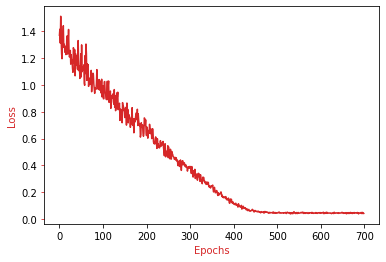

Train loss: 0.13871267437934875
Validation loss: 0.13670115172863007
First five predicted prices in test dataset: [116887.734 156928.84  191416.11  203897.8   177528.5  ]


In [87]:
# defining our training data and criterion
data = Data(train_x, train_y)
criterion = torch.nn.MSELoss()

# (hyper)parameters
learning_rate = 0.0001
batch_size = 500
dropout = 0.8
layers = [train_x.shape[1], 500, 1]
epochs = 700
    
validation_loss, model = prepare_and_train(layers, learning_rate, batch_size, dropout, epochs, plot=True)
print("Validation loss: " + str(validation_loss))
print("First five predicted prices in test dataset: " + str(predicted(model)[0:5]))

Let's see matching of the original and predicted prices on train and validation datasets:

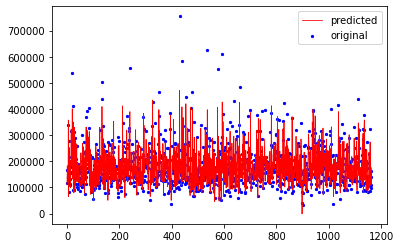

In [88]:
# Train dataset

x_ax = range(len(train_y))
plt.scatter(x_ax, train_y * SALEPRICE_MAX, s=5, color="blue", label="original")
train_y_predicted = (model(torch.from_numpy(train_x).type(torch.FloatTensor)).view(-1) * SALEPRICE_MAX).detach().numpy()
plt.plot(x_ax, train_y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.savefig('train_matching.jpg')
plt.show()

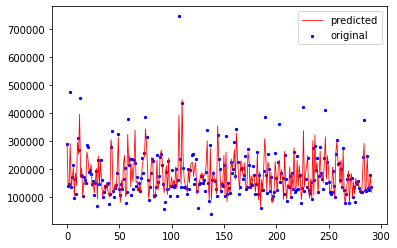

In [89]:
# Validation dataset

x_ax = range(len(validation_y))
plt.scatter(x_ax, validation_y * SALEPRICE_MAX, s=5, color="blue", label="original")
validation_y_predicted = (model(torch.from_numpy(validation_x).type(torch.FloatTensor)).view(-1) * SALEPRICE_MAX).detach().numpy()
plt.plot(x_ax, validation_y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.savefig('validation_matching.png')
plt.show()

We submitted predicted prices on test dataset to Kaggle, and it scored evaluation with 0.15537.

In [90]:
save_predictions_for_kaggle(model, '_neuralnetwork')